# 作业1 使用knn算法预测心仪指数

## 步骤1 准备数据

编写file2matrix函数，将文本数据转化为内存中的矩阵

In [4]:
"""将文本记录转换为numpy可接受的数据格式"""
import numpy as np
import operator
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

def file2matrix(filename):
    with open(filename,'r') as f:
        arrayOfLines = f.readlines()
        #print(arrayOfLines)
        numberOfLines = len(arrayOfLines) # 返回文件的行数
        #print("文件的行数：%s" % numberOfLines)
        returnMat = np.zeros((numberOfLines,3)) # 创建Numpy矩阵,并以0来填充
        #print("创建的矩阵：")
        #print(returnMat)
        
        classLabelVector = []
        index = 0
        for line in arrayOfLines:
            """解析文件数据到列表"""
            line = line.strip()
            listFromLine = line.split('\t')
            returnMat[index,:] = listFromLine[0:3]
            #classLabelVector.append(np.int(listFromLine[-1])) #TODO:问题语句
            '''
            if listFromLine[-1] == 'largedose':
                classLabelVector.append(2)
            elif listFromLine[-1] == 'smalldose':
                classLabelVector.append(1)
            else:
                classLabelVector.append(0)
            '''    
            classLabelVector.append(listFromLine[-1])
            index += 1
        #将字符串转换为离散数值largedoses为1，didntlike为0，smalldoses为2
        classLabelVector = LabelEncoder().fit_transform(classLabelVector)
    return returnMat,classLabelVector   

file2matrix("data\dating\datingTestSet.txt")

(array([[4.0920000e+04, 8.3269760e+00, 9.5395200e-01],
        [1.4488000e+04, 7.1534690e+00, 1.6739040e+00],
        [2.6052000e+04, 1.4418710e+00, 8.0512400e-01],
        ...,
        [2.6575000e+04, 1.0650102e+01, 8.6662700e-01],
        [4.8111000e+04, 9.1345280e+00, 7.2804500e-01],
        [4.3757000e+04, 7.8826010e+00, 1.3324460e+00]]),
 array([1, 2, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 2, 1, 2, 0,
        2, 1, 2, 1, 2, 1, 2, 0, 1, 0, 1, 0, 2, 0, 0, 2, 1, 1, 0, 2, 1, 1,
        1, 0, 0, 0, 0, 2, 2, 0, 1, 2, 2, 2, 2, 1, 0, 2, 0, 2, 2, 2, 2, 2,
        1, 2, 1, 0, 2, 1, 2, 2, 0, 1, 0, 0, 1, 1, 0, 2, 1, 0, 1, 0, 2, 2,
        0, 0, 1, 1, 0, 2, 0, 1, 1, 2, 0, 0, 1, 0, 2, 1, 1, 2, 1, 1, 0, 2,
        1, 2, 0, 1, 0, 2, 0, 0, 2, 1, 2, 1, 2, 1, 2, 0, 1, 1, 1, 0, 1, 2,
        2, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 2, 1, 1, 0, 2, 1, 2, 2, 1, 1,
        1, 0, 2, 2, 0, 0, 1, 2, 1, 1, 0, 2, 0, 1, 0, 2, 1, 2, 1, 0, 0, 0,
        1, 2, 1, 0, 1, 2, 0, 1, 2, 2, 1, 2, 1, 2, 0, 0, 1, 0, 1

## 利用可视化分析数据

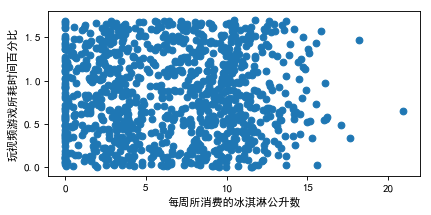

In [6]:
import matplotlib.pyplot as plt

datingDataMat,datingLabels = file2matrix("data\dating\datingTestSet.txt")

fig = plt.figure(figsize=(6,6),dpi=80)
ax = fig.add_subplot(211)
ax.scatter(datingDataMat[:,1],datingDataMat[:,2])
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
plt.ylabel('玩视频游戏所耗时间百分比')
plt.xlabel('每周所消费的冰淇淋公升数')

plt.show()